3D Random Walk Simulation
Serial Time: 4.520714s
Parallel Time: 1.119383s


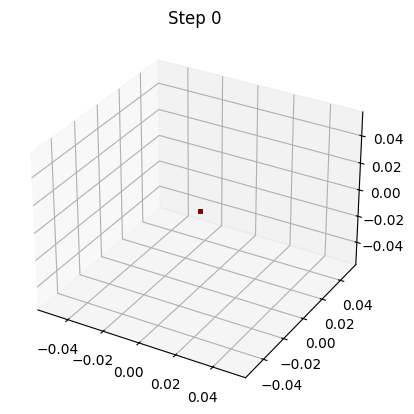

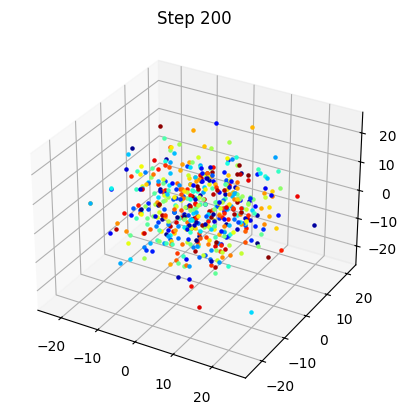

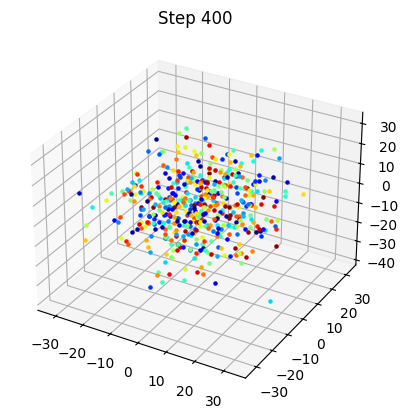

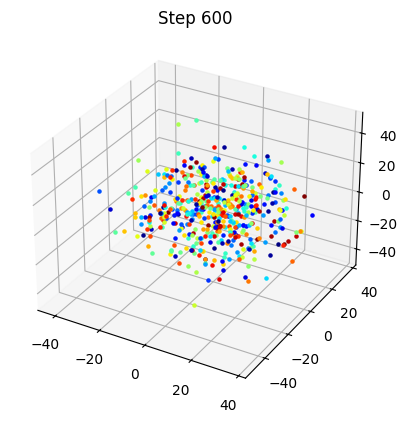

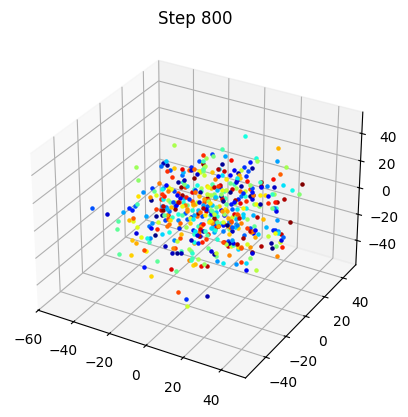

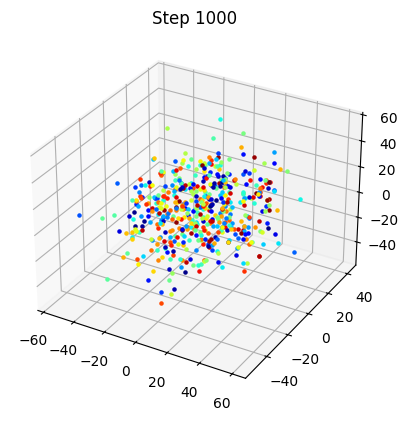

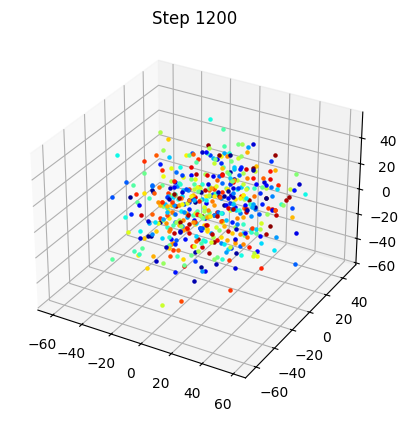

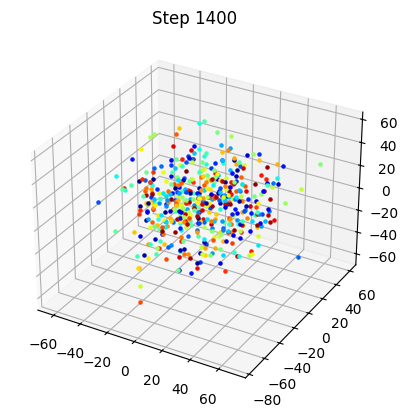

array([[ 3.29814330e+00, -3.16927173e+00,  1.52424527e+01],
       [ 4.94894584e+00,  1.32769219e+01, -3.69404891e+00],
       [-3.41566617e+01, -9.21725756e+00, -8.37316881e+00],
       ...,
       [-1.65593006e+01, -8.00251402e+00,  2.72192163e+01],
       [ 1.86304865e+01, -3.54033353e-02,  1.39244104e+01],
       [ 1.52099785e+01,  3.67668984e+01,  1.03040266e+01]])

In [4]:
"""
# 3D Random Walk Simulation 
---------------------------

Este código implementa una simulación de caminata aleatoria en tres dimensiones para un número de partículas definido. Cada partícula se desplaza aleatoriamente en las tres direcciones del espacio, y su posición se actualiza en cada paso.

Usos:
- Modelado de fenómenos estocásticos, como difusión y transporte de partículas.

Visualización:
- En la versión secuencial, se puede habilitar la visualización en 3D de las posiciones de las partículas en intervalos definidos.

> https://es.wikipedia.org/wiki/Camino_aleatorio
"""

from numba import njit, prange
import matplotlib.pyplot as plt
import numpy as np
import time

PARTICLE_COUNT = 500
STEPS = 1_600
WRITE_FREQUENCY = 200


def random_walk_3D_serial(n_steps: int, n_particles: int, enable_plot: bool = False):
    positions = np.zeros((n_particles, 3))  # (x, y, z) for each particle
    colors = plt.cm.jet(np.linspace(0, 1, n_particles))

    for i in range(n_steps):
        if i % WRITE_FREQUENCY == 0 and enable_plot:
            plt.figure()
            ax = plt.axes(projection="3d")

            for j in range(n_particles):
                ax.scatter(
                    positions[j, 0],
                    positions[j, 1],
                    positions[j, 2],
                    color=colors[j],
                    s=5,
                )

            plt.title(f"Step {i}")
            plt.show()

        for j in range(n_particles):
            positions[j, 0] += np.random.uniform(-1, 1)  # x
            positions[j, 1] += np.random.uniform(-1, 1)  # y
            positions[j, 2] += np.random.uniform(-1, 1)  # z

    return positions


@njit(parallel=True)
def random_walk_3D_parallel(n_steps: int, n_particles: int):
    positions = np.zeros((n_particles, 3))  # (x, y, z) for each particle

    for i in range(n_steps):
        for j in prange(n_particles):
            positions[j, 0] += np.random.uniform(-1, 1)  # x
            positions[j, 1] += np.random.uniform(-1, 1)  # y
            positions[j, 2] += np.random.uniform(-1, 1)  # z

    return positions


print("3D Random Walk Simulation")

serial_start = time.perf_counter()
random_walk_3D_serial(STEPS, PARTICLE_COUNT, enable_plot=False)
serial_end = time.perf_counter()
print(f"Serial Time: {serial_end - serial_start:.6f}s")

parallel_start = time.perf_counter()
random_walk_3D_parallel(STEPS, PARTICLE_COUNT)
parallel_end = time.perf_counter()
print(f"Parallel Time: {parallel_end - parallel_start:.6f}s")

random_walk_3D_serial(
    STEPS, PARTICLE_COUNT, enable_plot=True
)  # Call again for visualization purposes only as particles will be different